In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [14]:
df = pd.read_csv("../data/aqi.csv")
df.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [15]:
df.shape


(18265, 16)

In [16]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [17]:
df.isnull().sum()


City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [18]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01,Delhi,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
2015-01-01,Mumbai,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2015-01-01,Chennai,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
2015-01-01,Kolkata,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
2015-01-01,Bangalore,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [19]:
df['City'].unique()


array(['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore'], dtype=object)

In [20]:
delhi_df = df.loc[df['City'] == 'Delhi'].copy()
delhi_df.head()


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Datetime,,,,,,,,,,,,,,,
2015-01-01,Delhi,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
2015-01-02,Delhi,344.2,173.2,179.8,128.4,156.1,15.6,6.28,7.5,9.4,0.55,15.60,2.45,238.5,Satisfactory
2015-01-03,Delhi,473.9,20.1,12.7,102.7,244.7,42.5,0.04,29.8,42.0,1.87,15.11,2.41,77.6,Satisfactory
2015-01-04,Delhi,32.4,414.8,198.1,25.6,218.2,13.2,2.47,50.4,80.2,7.70,12.46,0.57,85.4,Satisfactory
2015-01-05,Delhi,312.8,155.8,143.1,106.8,6.1,4.9,4.04,2.0,101.3,13.41,1.66,4.46,396.8,Poor


In [21]:
delhi_df.shape


(3653, 15)

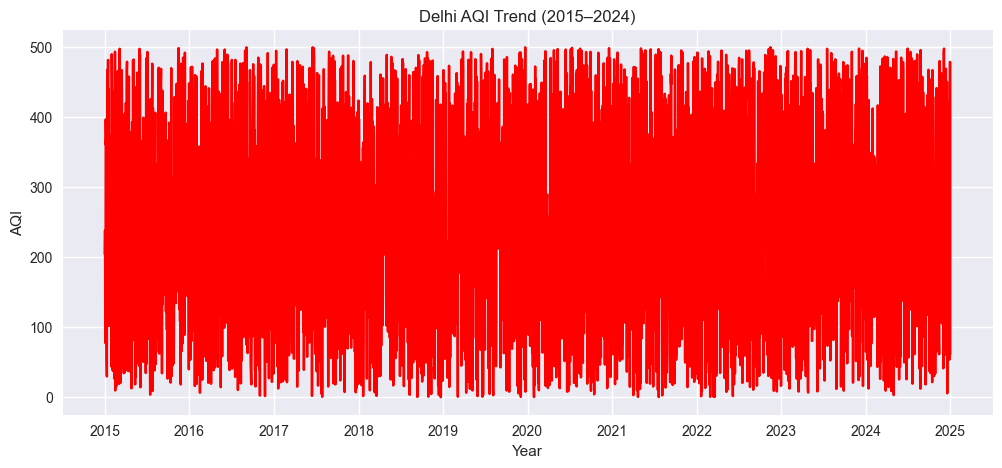

In [22]:
plt.figure(figsize=(12,5))
plt.plot(delhi_df.index, delhi_df['AQI'], color='red')
plt.title("Delhi AQI Trend (2015–2024)")
plt.xlabel("Year")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


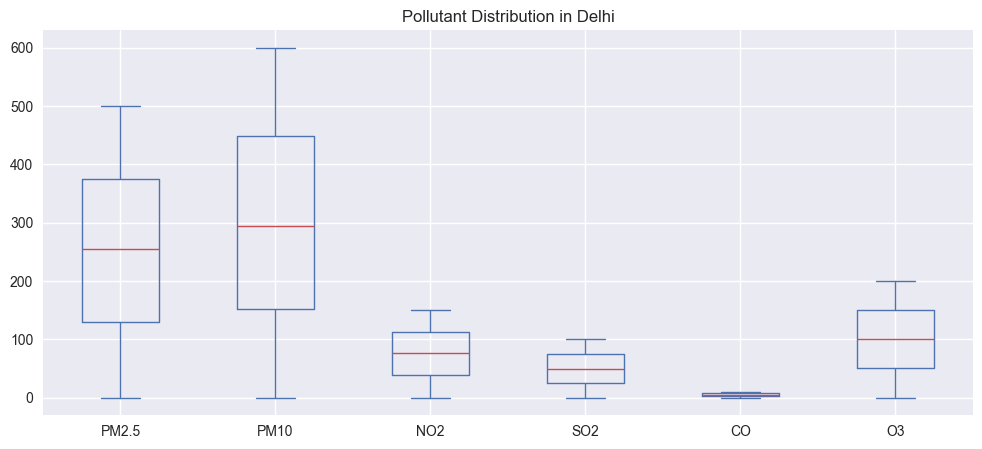

In [23]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3']

delhi_df[pollutants].plot(
    kind='box',
    figsize=(12,5),
    title='Pollutant Distribution in Delhi'
)
plt.show()


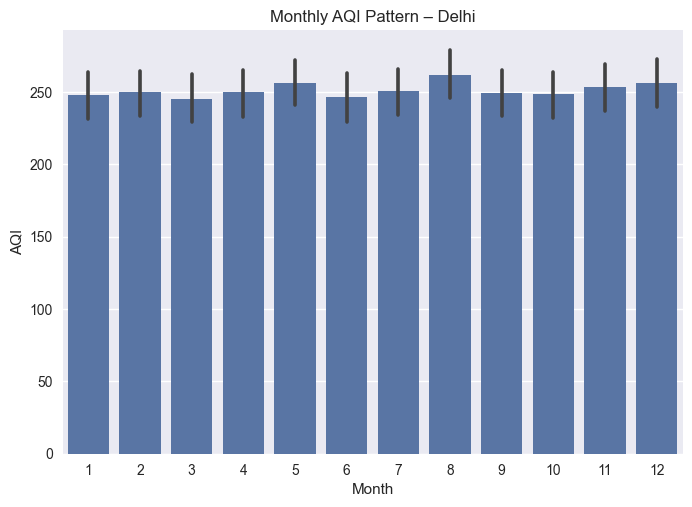

In [24]:
delhi_df['Month'] = delhi_df.index.month

sns.barplot(x='Month', y='AQI', data=delhi_df)
plt.title("Monthly AQI Pattern – Delhi")
plt.show()


In [26]:
from prophet import Prophet


In [27]:
prophet_df = delhi_df.reset_index()[['Datetime', 'AQI']]
prophet_df.columns = ['ds', 'y']

prophet_df.head()


,ds,y
0,2015-01-01,204.5
1,2015-01-02,238.5
2,2015-01-03,77.6
3,2015-01-04,85.4
4,2015-01-05,396.8


In [28]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(prophet_df)


20:12:56 - cmdstanpy - INFO - Chain [1] start processing
20:12:57 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
4013,2025-12-27,269.332962,86.488547,461.485595
4014,2025-12-28,269.594974,68.748994,453.617748
4015,2025-12-29,269.628330,83.790273,442.334868
4016,2025-12-30,269.424547,86.733390,455.742019
4017,2025-12-31,268.981016,77.577808,449.873925


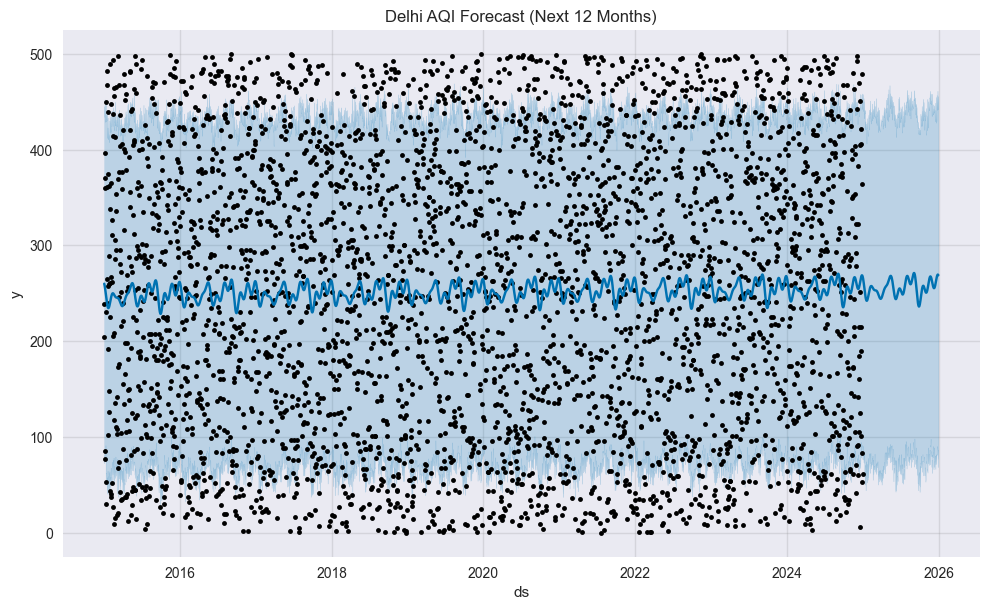

In [30]:
model.plot(forecast)
plt.title("Delhi AQI Forecast (Next 12 Months)")
plt.show()


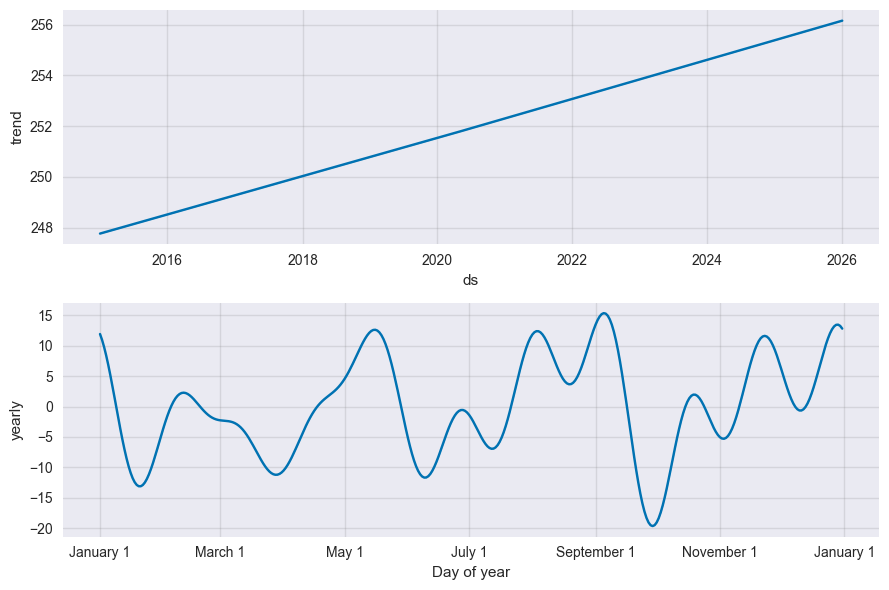

In [31]:
model.plot_components(forecast)
plt.show()


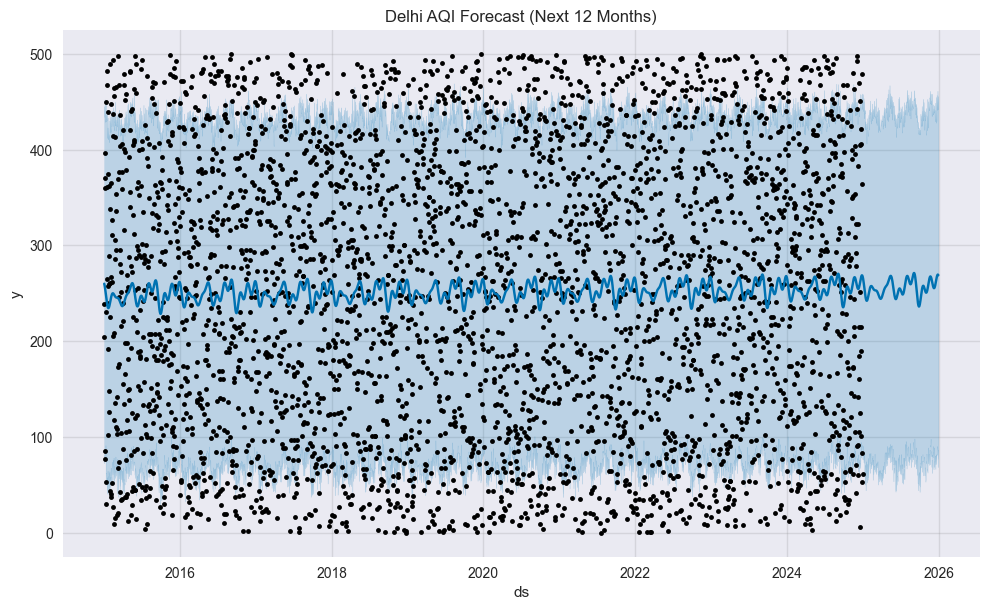

In [32]:
fig = model.plot(forecast)
plt.title("Delhi AQI Forecast (Next 12 Months)")
plt.savefig("../output/delhi_aqi_forecast.png", dpi=300)
plt.show()


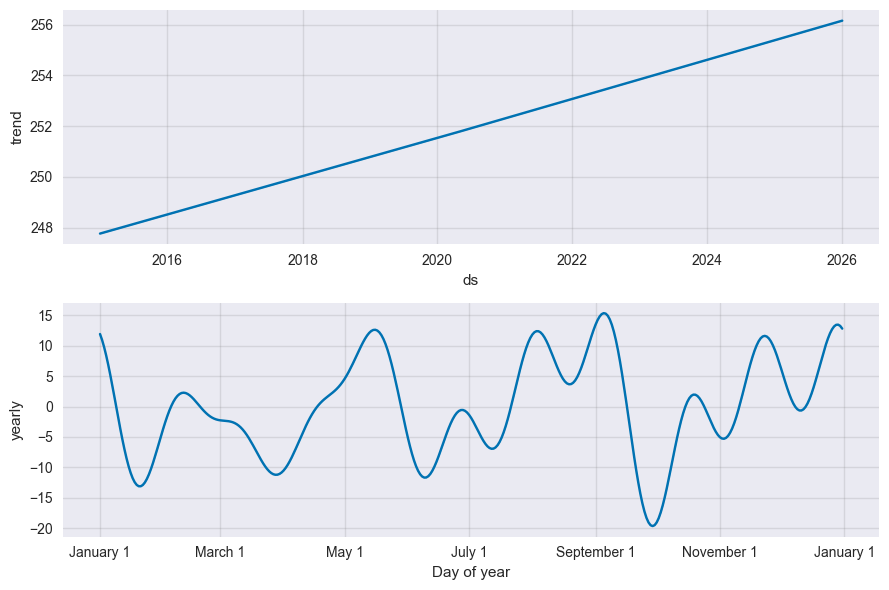

In [33]:
fig2 = model.plot_components(forecast)
plt.savefig("../output/delhi_aqi_seasonality.png", dpi=300)
plt.show()
